# Mapping Longitude & Latitude to UK Postcodes


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot  as plt


In [ ]:
crime_df = pd.read_csv('../data/london_crime_sep14_nov24.csv')
crime_df['Month'] = pd.to_datetime(crime_df['Month'], format='%Y-%m') # causes all data to be put on the first of each month
crime_df = crime_df.dropna()
crime_df.columns = ['index', 'Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type']
]


postcode_df = pd.read_csv('../data/ukpostcodes.csv')
postcode_df.columns = ['id', 'Postcode', 'Latitude', 'Longitude']





display(crime_df)
display(postcode_df)

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,0,787a98e8975cc1bc9cec201e22a9bd52494b890df2d53b...,2012-01-01,City of London Police,City of London Police,-0.096363,51.513377,On or near NEW CHANGE,E01032739,City of London 001F,Offender given conditional discharge
1,1,8a85eb575007605444debbcd13304c1a780df5a0b84ce7...,2012-01-01,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Offender given conditional discharge
2,2,d7bfb1619b153c7e28232da1735371771d59ab00684396...,2012-01-01,City of London Police,City of London Police,-0.084618,51.512682,On or near GRACECHURCH STREET,E01032739,City of London 001F,Offender fined
3,3,7c9523e2348acf8c1de4013adce06e9285e997b6701a0e...,2012-01-01,City of London Police,City of London Police,-0.096075,51.514766,On or near FOSTER LANE,E01032739,City of London 001F,Offender given conditional discharge
4,4,b631c8bb196123bb235e9d09988ff33781cdc685a626b4...,2012-01-01,City of London Police,City of London Police,-0.093257,51.513920,On or near BOW LANE,E01032739,City of London 001F,Offender fined
...,...,...,...,...,...,...,...,...,...,...,...
8507106,8507106,69d8f3432285b3834776d24f67acef88daa5938861d4d2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.165860,51.436150,On or near Bevin Square,E01004626,Wandsworth 027F,Investigation complete; no suspect identified
8507107,8507107,c1f402bef15fee0242d3f17c234367a619fe168b3f3039...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.156802,51.488174,On or near East Road,E01002901,Kensington and Chelsea 018C,Investigation complete; no suspect identified
8507108,8507108,5c8b7364aa943e5bb30fb6611abc56a5d88871b4cf1bb2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.260297,51.593616,On or near Supermarket,E01033929,Brent 002F,Investigation complete; no suspect identified
8507109,8507109,a78ff6fcdfd4730c4bde7307f68a30e2908dfd3b3a8e70...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.132459,51.511790,On or near A401,E01004763,Westminster 013B,Investigation complete; no suspect identified


,id,Postcode,Latitude,Longitude
0,1,AB10 1XG,57.144165,-2.114848
1,2,AB10 6RN,57.137880,-2.121487
2,3,AB10 7JB,57.124274,-2.127190
3,4,AB11 5QN,57.142701,-2.093295
4,5,AB11 6UL,57.137547,-2.112233
...,...,...,...,...
1801370,2727010,YO8 1FH,53.784954,-1.067704
1801371,2727011,YO8 1FJ,53.784954,-1.067704
1801372,2727012,YO8 5DS,53.828322,-0.965433
1801373,2727013,ZE1 0FJ,60.140839,-1.263912


## Specify London Data Only

In [3]:
# https://en.wikipedia.org/wiki/Module:Location_map/data/United_Kingdom_Greater_London

# crime_df = crime_df[:10000]

crime_df = crime_df[(crime_df['Longitude'] > -0.57) & (crime_df['Longitude'] < 0.37)]
crime_df = crime_df[(crime_df['Latitude'] > 51.25)  & (crime_df['Latitude'] < 51.72)]
crime_df

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,0,787a98e8975cc1bc9cec201e22a9bd52494b890df2d53b...,2012-01-01,City of London Police,City of London Police,-0.096363,51.513377,On or near NEW CHANGE,E01032739,City of London 001F,Offender given conditional discharge
1,1,8a85eb575007605444debbcd13304c1a780df5a0b84ce7...,2012-01-01,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Offender given conditional discharge
2,2,d7bfb1619b153c7e28232da1735371771d59ab00684396...,2012-01-01,City of London Police,City of London Police,-0.084618,51.512682,On or near GRACECHURCH STREET,E01032739,City of London 001F,Offender fined
3,3,7c9523e2348acf8c1de4013adce06e9285e997b6701a0e...,2012-01-01,City of London Police,City of London Police,-0.096075,51.514766,On or near FOSTER LANE,E01032739,City of London 001F,Offender given conditional discharge
4,4,b631c8bb196123bb235e9d09988ff33781cdc685a626b4...,2012-01-01,City of London Police,City of London Police,-0.093257,51.513920,On or near BOW LANE,E01032739,City of London 001F,Offender fined
...,...,...,...,...,...,...,...,...,...,...,...
8507106,8507106,69d8f3432285b3834776d24f67acef88daa5938861d4d2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.165860,51.436150,On or near Bevin Square,E01004626,Wandsworth 027F,Investigation complete; no suspect identified
8507107,8507107,c1f402bef15fee0242d3f17c234367a619fe168b3f3039...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.156802,51.488174,On or near East Road,E01002901,Kensington and Chelsea 018C,Investigation complete; no suspect identified
8507108,8507108,5c8b7364aa943e5bb30fb6611abc56a5d88871b4cf1bb2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.260297,51.593616,On or near Supermarket,E01033929,Brent 002F,Investigation complete; no suspect identified
8507109,8507109,a78ff6fcdfd4730c4bde7307f68a30e2908dfd3b3a8e70...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.132459,51.511790,On or near A401,E01004763,Westminster 013B,Investigation complete; no suspect identified


# Map the Co-ordinates to Postcodes

In [ ]:
crime_gdf = gpd.GeoDataFrame(crime_df, 
                             geometry=gpd.points_from_xy(crime_df.Longitude, crime_df.Latitude),
                             crs="EPSG:4326")  # WGS84 (Lat/Lon)

postcode_gdf = gpd.GeoDataFrame(postcode_df, 
                                geometry=gpd.points_from_xy(postcode_df.Longitude, postcode_df.Latitude),
                                crs="EPSG:4326")  # WGS84 (Lat/Lon)

# **Reproject to a projected CRS (British National Grid)**
crime_gdf = crime_gdf.to_crs(epsg=27700)
postcode_gdf = postcode_gdf.to_crs(epsg=27700)

# Perform spatial join
matched = gpd.sjoin_nearest(crime_gdf, postcode_gdf, how="left", distance_col="Distance (m)", rsuffix='postcode')

# Display result
df = pd.DataFrame(matched)
df = df.drop_duplicates('index') # duplicates created when colse to multiple post codes


df

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude_left,Latitude_left,Location,LSOA code,LSOA name,Outcome type,geometry,index_postcode,id,Postcode,Latitude_postcode,Longitude_postcode,Distance(m)
0,0,787a98e8975cc1bc9cec201e22a9bd52494b890df2d53b...,2012-01-01,City of London Police,City of London Police,-0.096363,51.513377,On or near NEW CHANGE,E01032739,City of London 001F,Offender given conditional discharge,POINT (532193.031 181101.029),1642755,1771750,EC4M 9AF,51.513622,-0.096170,30.368251
1,1,8a85eb575007605444debbcd13304c1a780df5a0b84ce7...,2012-01-01,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Offender given conditional discharge,POINT (533330.987 181598.02),1149998,1235943,EC2M 4NS,51.517607,-0.079554,16.466679
2,2,d7bfb1619b153c7e28232da1735371771d59ab00684396...,2012-01-01,City of London Police,City of London Police,-0.084618,51.512682,On or near GRACECHURCH STREET,E01032739,City of London 001F,Offender fined,POINT (533009.99 181045.007),1149405,1234881,EC3V 0DR,51.512732,-0.084685,7.250075
3,3,7c9523e2348acf8c1de4013adce06e9285e997b6701a0e...,2012-01-01,City of London Police,City of London Police,-0.096075,51.514766,On or near FOSTER LANE,E01032739,City of London 001F,Offender given conditional discharge,POINT (532208.996 181256.01),1149909,1235716,EC2V 6BJ,51.514581,-0.095866,25.178269
4,4,b631c8bb196123bb235e9d09988ff33781cdc685a626b4...,2012-01-01,City of London Police,City of London Police,-0.093257,51.513920,On or near BOW LANE,E01032739,City of London 001F,Offender fined,POINT (532406.971 181167.023),1149907,1235714,EC2V 6AX,51.513754,-0.093105,21.267275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8507106,8507106,69d8f3432285b3834776d24f67acef88daa5938861d4d2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.165860,51.436150,On or near Bevin Square,E01004626,Wandsworth 027F,Investigation complete; no suspect identified,POINT (527586.017 172389.98),231347,250745,SW17 7BB,51.436350,-0.166097,27.685032
8507107,8507107,c1f402bef15fee0242d3f17c234367a619fe168b3f3039...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.156802,51.488174,On or near East Road,E01002901,Kensington and Chelsea 018C,Investigation complete; no suspect identified,POINT (528069.979 178191.008),223795,241663,SW3 4SL,51.488178,-0.157032,15.978938
8507108,8507108,5c8b7364aa943e5bb30fb6611abc56a5d88871b4cf1bb2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.260297,51.593616,On or near Supermarket,E01033929,Brent 002F,Investigation complete; no suspect identified,POINT (520605.987 189740.953),1702530,2585687,NW9 0FH,51.593000,-0.260000,71.545854
8507109,8507109,a78ff6fcdfd4730c4bde7307f68a30e2908dfd3b3a8e70...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.132459,51.511790,On or near A401,E01004763,Westminster 013B,Investigation complete; no suspect identified,POINT (529692.977 180860.018),104843,113250,W1D 6QZ,51.511715,-0.132274,15.313349


# Visualise this to verify it has worked correctly:

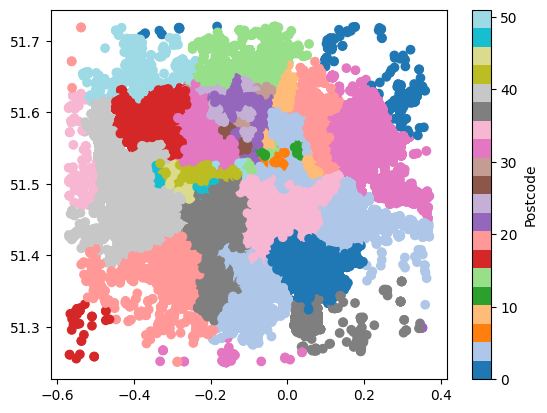

In [69]:
plt.scatter(df['Longitude_left'], df['Latitude_left'], c=df['Postcode'].str[:2].astype('category').cat.codes, cmap='tab20')

# Add a colour bar to show the legend
plt.colorbar(label='Postcode')

# Show the plot
plt.show()

In [ ]:
df.to_csv('../data/london_crimes_with_postcodes.csv')

# How to Quantify a Crime Score?

- **crimes per month** per **first 2 postcode letters**  
- Gini index?

In [ ]:
# postcodes = df['Postcode'].str[:2].value_counts()
# crime_scores = []


# for postcode in postcodes:

#     score = postcode / len(df)

#     crime_scores.append(score)
                        

# normalised_crime_scores = [i/max(crime_scores) for i in crime_scores]

# postcode_dict = dict(zip(postcodes.index, normalised_crime_scores))

# postcode_dict

# df['crime_score'] = df['Postcode'].str[:2].map(postcode_dict)


# df

{'SE': 1.0,
 'SW': 0.8033566564921343,
 'E1': 0.5876318384597324,
 'NW': 0.5518149800422635,
 'W1': 0.49168443296548486,
 'N1': 0.48093824841512095,
 'UB': 0.3239859121859592,
 'TW': 0.311395163183846,
 'HA': 0.3073003052359709,
 'CR': 0.3056463958675746,
 'RM': 0.3029913125146748,
 'IG': 0.24794552711904205,
 'BR': 0.19037708382249358,
 'WC': 0.17555200751350084,
 'EN': 0.150395867574548,
 'EC': 0.13436863113406905,
 'DA': 0.1334810988494952,
 'KT': 0.12481991077717774,
 'SM': 0.12092603897628552,
 'N2': 0.08554026766846679,
 'E2': 0.07562808170932145,
 'W2': 0.0752016905376849,
 'E6': 0.07286217421930032,
 'E8': 0.06325804179384832,
 'N4': 0.05953979807466542,
 'E3': 0.058837285747828136,
 'N7': 0.055737966658840114,
 'W6': 0.051778351725757225,
 'W3': 0.04872035689128904,
 'W5': 0.04637802301009627,
 'N9': 0.04560788917586288,
 'E4': 0.04424418877670815,
 'E9': 0.04392862174219301,
 'E5': 0.042699225170227756,
 'E7': 0.04036440478985678,
 'W4': 0.0335449636064804,
 'N8': 0.030718008

In [ ]:
# Assuming your other DataFrame is 'other_df' and it has a 'Postcode' column
df

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude_left,Latitude_left,Location,LSOA code,LSOA name,Outcome type,geometry,index_postcode,id,Postcode,Latitude_postcode,Longitude_postcode,Distance(m),crime_score
0,0,787a98e8975cc1bc9cec201e22a9bd52494b890df2d53b...,2012-01-01,City of London Police,City of London Police,-0.096363,51.513377,On or near NEW CHANGE,E01032739,City of London 001F,Offender given conditional discharge,POINT (532193.031 181101.029),1642755,1771750,EC4M 9AF,51.513622,-0.096170,30.368251,0.134369
1,1,8a85eb575007605444debbcd13304c1a780df5a0b84ce7...,2012-01-01,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Offender given conditional discharge,POINT (533330.987 181598.02),1149998,1235943,EC2M 4NS,51.517607,-0.079554,16.466679,0.134369
2,2,d7bfb1619b153c7e28232da1735371771d59ab00684396...,2012-01-01,City of London Police,City of London Police,-0.084618,51.512682,On or near GRACECHURCH STREET,E01032739,City of London 001F,Offender fined,POINT (533009.99 181045.007),1149405,1234881,EC3V 0DR,51.512732,-0.084685,7.250075,0.134369
3,3,7c9523e2348acf8c1de4013adce06e9285e997b6701a0e...,2012-01-01,City of London Police,City of London Police,-0.096075,51.514766,On or near FOSTER LANE,E01032739,City of London 001F,Offender given conditional discharge,POINT (532208.996 181256.01),1149909,1235716,EC2V 6BJ,51.514581,-0.095866,25.178269,0.134369
4,4,b631c8bb196123bb235e9d09988ff33781cdc685a626b4...,2012-01-01,City of London Police,City of London Police,-0.093257,51.513920,On or near BOW LANE,E01032739,City of London 001F,Offender fined,POINT (532406.971 181167.023),1149907,1235714,EC2V 6AX,51.513754,-0.093105,21.267275,0.134369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8507106,8507106,69d8f3432285b3834776d24f67acef88daa5938861d4d2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.165860,51.436150,On or near Bevin Square,E01004626,Wandsworth 027F,Investigation complete; no suspect identified,POINT (527586.017 172389.98),231347,250745,SW17 7BB,51.436350,-0.166097,27.685032,0.803357
8507107,8507107,c1f402bef15fee0242d3f17c234367a619fe168b3f3039...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.156802,51.488174,On or near East Road,E01002901,Kensington and Chelsea 018C,Investigation complete; no suspect identified,POINT (528069.979 178191.008),223795,241663,SW3 4SL,51.488178,-0.157032,15.978938,0.803357
8507108,8507108,5c8b7364aa943e5bb30fb6611abc56a5d88871b4cf1bb2...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.260297,51.593616,On or near Supermarket,E01033929,Brent 002F,Investigation complete; no suspect identified,POINT (520605.987 189740.953),1702530,2585687,NW9 0FH,51.593000,-0.260000,71.545854,0.551815
8507109,8507109,a78ff6fcdfd4730c4bde7307f68a30e2908dfd3b3a8e70...,2024-11-01,Metropolitan Police Service,Metropolitan Police Service,-0.132459,51.511790,On or near A401,E01004763,Westminster 013B,Investigation complete; no suspect identified,POINT (529692.977 180860.018),104843,113250,W1D 6QZ,51.511715,-0.132274,15.313349,0.491684


In [ ]:
# # Function to calculate the crime scores for each month
# def calculate_crime_scores(group):
#     postcodes = group['Postcode'].str[:2].value_counts()
    
#     # Calculate crime scores based on the number of occurrences
#     crime_scores = []
#     for postcode in postcodes:
#         score = postcode / len(group)
#         crime_scores.append(score)
    
#     # Normalize the crime scores
#     normalised_crime_scores = [i/max(crime_scores) for i in crime_scores]
    
#     # Create the postcode to normalised crime score mapping
#     postcode_dict = dict(zip(postcodes.index, normalised_crime_scores))
    
#     # Map the normalised crime scores back to the group
#     group['crime_score'] = group['Postcode'].str[:2].map(postcode_dict)
#     return group

# # Apply the function to each month group
# test = df.groupby('YearMonth', group_keys=False).apply(calculate_crime_scores)

# # View the resulting DataFrame
# print(test)

                    Unnamed: 0  \
Month                            
2012-01-01 0                 0   
           1                 1   
           2                 2   
           3                 3   
           4                 4   
...                        ...   
2024-11-01 8507106     8507106   
           8507107     8507107   
           8507108     8507108   
           8507109     8507109   
           8507110     8507110   

                                                             Crime ID  \
Month                                                                   
2012-01-01 0        787a98e8975cc1bc9cec201e22a9bd52494b890df2d53b...   
           1        8a85eb575007605444debbcd13304c1a780df5a0b84ce7...   
           2        d7bfb1619b153c7e28232da1735371771d59ab00684396...   
           3        7c9523e2348acf8c1de4013adce06e9285e997b6701a0e...   
           4        b631c8bb196123bb235e9d09988ff33781cdc685a626b4...   
...                                           

C:\Users\15kof\AppData\Local\Temp\ipykernel_13872\1514883914.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test = df.groupby('Month').apply(calculate_crime_scores)
